In [46]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df['flowers']=df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flowers
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [27]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

Sepal Length vs Sepal Width (setosa vs versicolor)





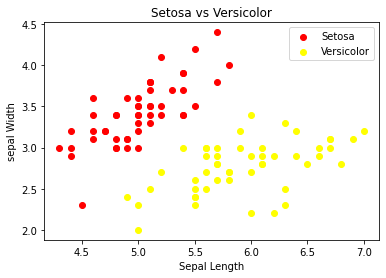

In [28]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='red',label='Setosa')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='yellow',label='Versicolor')
plt.xlabel('Sepal Length')
plt.ylabel('sepal Width')
plt.title('Setosa vs Versicolor')
plt.legend()
plt.show()


In [29]:
x=df.drop(['target','flowers'],axis=1)
y=df['target']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,stratify=y)


KNN

In [39]:
train_accuracy=[]
test_accuracy=[]
neighbors=np.arange(1,26)
for neighbor in range(1,26):
  knn=KNeighborsClassifier(n_neighbors=neighbor)
  knn.fit(xtrain,ytrain)
  train_accuracy.append(knn.score(xtrain,ytrain))
  test_accuracy.append(knn.score(xtest,ytest))
test_accuracy


[0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9555555555555556,
 0.9333333333333333,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9555555555555556,
 0.9555555555555556,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333]

Plotting accuracies of Training and testing data to select value of k.

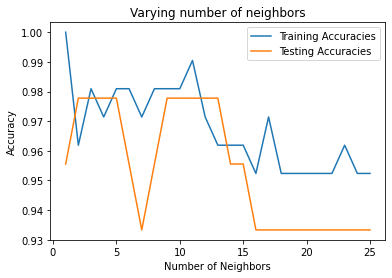

In [40]:

plt.plot(range(1,26),train_accuracy,label='Training Accuracies')
plt.plot(range(1,26),test_accuracy,label='Testing Accuracies')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Varying number of neighbors')
plt.legend()
plt.show()

Creating KNN model again to check performance afterchoosing value of k 

In [41]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(xtrain,ytrain)
knn.score(xtest,ytest)

0.9777777777777777

In [47]:
pred=knn.predict(xtest)
cmatrix=confusion_matrix(ytest,pred)

Confusion Matrix

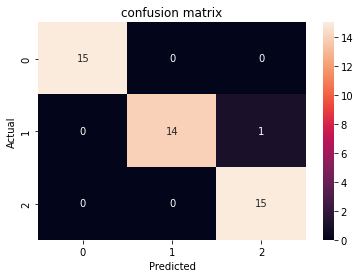

In [51]:
sns.heatmap(cmatrix,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('confusion matrix')
plt.show()